#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<ipython-input-19-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-19-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


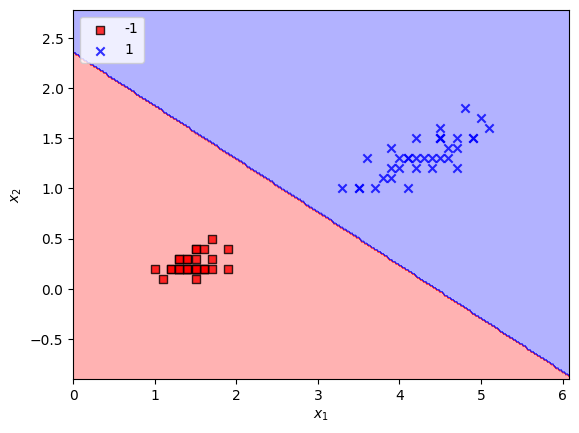

In [ ]:
def main():
    # pobiera danne do uczenia i testowania
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # selekcja danych z klas 0 i 1
    X_train_01_subset = X_train [(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train [(y_train == 0) | (y_train == 1)]
    # w perceptronie wyjście jest albo 1 albo -1    
    y_train_01_subset[(y_train_01_subset == 0)] = -1
    ppn = Perceptron(eta=0.1, n_iter=10)
    # uczenie modelu
    ppn.fit(X_train_01_subset, y_train_01_subset)

    # wyświetla wykres
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=ppn)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

<ipython-input-32-8c5418036cd1>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
<ipython-input-19-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-19-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


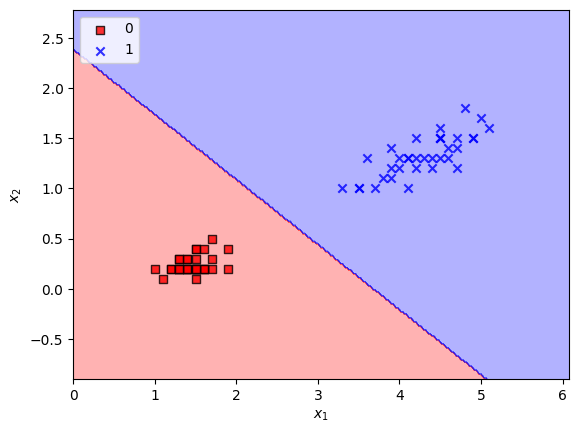

In [ ]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    lrgd = LogisticRegressionGD(eta=0.1, n_iter=10, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

# Program

##zad 1

In [ ]:
class MorePerceptrons:
    #eta to zmienna uczenia, n_iter to liczba powtórzeń
    def __init__(self, eta=0.01, n_iter=10):
        self.eta=eta
        self.n_iter=n_iter

    def fit(self, X, y):

        # zdefiniuj ile chcesz grup
        self.groups = np.unique(y)

        # zrób perceptrona na każdą grupę
        self.perceptrons = [Perceptron(self.eta, self.n_iter) for i in range(self.groups.size)]

        # uczenie
        for i, cls in enumerate(self.groups):
            self.perceptrons[i].fit(X, np.where(y == cls, 1, -1))

    def predict(self, X):
        y = np.empty((X.shape[0], len(self.perceptrons)))

        #przypisywanie grupek do punktów
        for i, p in enumerate(self.perceptrons):
            y[:, i] = p.net_input(X)
        
        # zwróć grupkę która najbardziej pasuje
        return np.argmax(y, axis=1)


<ipython-input-19-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-19-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


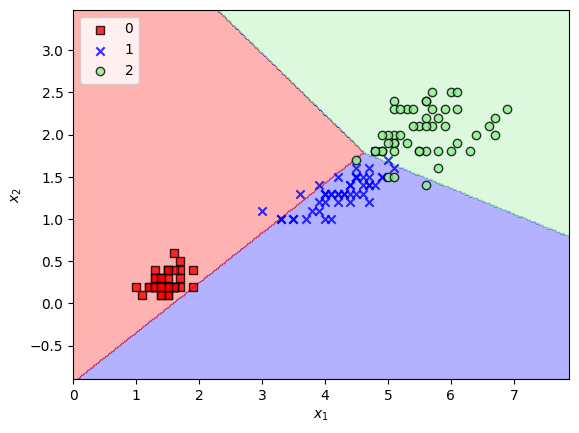

[[50  0  0]
 [ 3 45  2]
 [ 0  4 46]]


In [ ]:
from sklearn.metrics import confusion_matrix
def main():
  #ładuje dataset
  iris = datasets.load_iris()
  X = iris.data[:,[2,3]]
  y = iris.target

  #dzielę dane
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
  
  #tworzę klasę moreperceptrons
  mp = MorePerceptrons(eta=0.15,n_iter=200)

  #uczę model
  mp.fit(X_train, y_train)

  #używam podanej funkcji do pokazywania
  plot_decision_regions(X=X,y=y,classifier=mp)

  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.legend(loc='upper left')
  plt.show()

  print(confusion_matrix(y,mp.predict(X)))

if __name__ == '__main__':
    main()


##zad 2

In [ ]:
class MoreLogisticRegressionGD:
    # eta to zmienna uczenia, n_iter to liczba pokoleń, random_state odpowiada za rodzaj(?) pseudolosowości
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        #robimy grupy do regresji
        self.groups = np.unique(y)
        self.lrgd = [LogisticRegressionGD(self.eta, self.n_iter, self.random_state) for i in range(self.groups.size)]
        #uczenie modelu
        for i, cls in enumerate(self.groups):
            self.lrgd[i].fit(X, np.where(y == cls, 1, 0))
    #przewidujemy do jakiej grupy przynależy punkt
    def predict(self, X):
        return np.argmax(self.activation(X), axis=1)
    #pokazujemy jaka jest wartość aktywacji
    def activation(self, X):
        y = np.zeros((X.shape[0], self.groups.size))
        for i, r in enumerate(self.lrgd):
            y[:, i] = r.activation(r.net_input(X))
        return y


## zad 3


<ipython-input-32-8c5418036cd1>:24: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
<ipython-input-19-c3925fdf5904>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
<ipython-input-19-c3925fdf5904>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


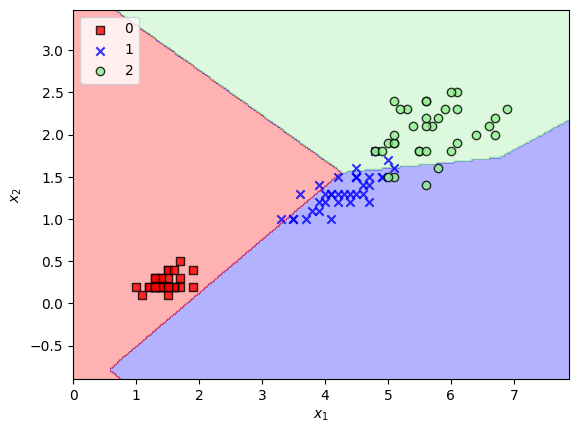

[[1. 0.]]
[[0.         0.        ]
 [0.         0.99987591]
 [0.         0.99999822]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.99999699]
 [0.         0.99998067]
 [0.         0.        ]
 [0.         0.99999959]
 [0.         0.00000044]
 [0.         0.99999959]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.9999999 ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.00000168]
 [0.         0.        ]
 [0.         0.99909622]
 [0.         0.        ]
 [0.         0.99999735]
 [0.         0.99999959]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.9999999 ]
 [0.         0.99999735]
 [0.         0.99999959]
 [0.         0.

In [ ]:
def probability(X, cls, classifier):
    probabilities = classifier.activation(X)
    return np.choose(cls, probabilities.T)

def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # tworzę model
    lrgd = MoreLogisticRegressionGD(eta=0.15, n_iter=1000, random_state=1)
    #uczę model
    lrgd.fit(X_train, y_train)

    #robię wykres
    lrgd.fit(X_train, y_train)
    plot_decision_regions(X=X_train, y=y_train, classifier=lrgd)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    
    #zmieniam opcje drukowania żeby wyglądało jak prawdopodobieństwo
    np.set_printoptions(suppress=True)

    # drukujemy przynależność
    shape = X_test.shape[0]
    cls = np.full(shape,0,dtype=np.int64)
    probs = probability(X_test, cls, lrgd)
    print(np.c_[cls, probs])

if __name__ == '__main__':
    main()